In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, LSTM, GRU, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
tf.__version__
keras.__version__

'2.7.0'

(15000, 28, 28)
(15000,)
(45000, 28, 28)
(45000,)


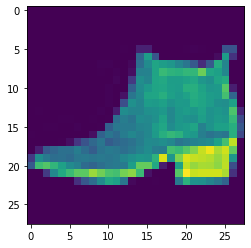

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:15000] / 255.0, X_train_full[15000:] / 255.0
y_valid, y_train = y_train_full[:15000], y_train_full[15000:]

print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)
plt.imshow(X_train[1])

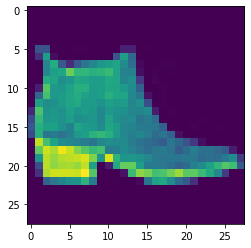

In [3]:
# R->L
# flip horizontally

X_trainRtoL = np.flip(X_train,2)
X_validRtoL = np.flip(X_valid,2)
X_testRtoL = np.flip(X_test,2)

plt.imshow(X_trainRtoL[1])

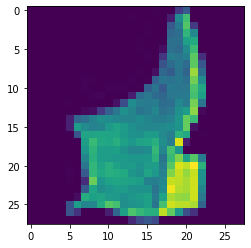

In [4]:
# T->B
# transpose

X_trainTtoB = np.transpose(X_train,(0,2,1))
X_validTtoB = np.transpose(X_valid,(0,2,1))
X_testTtoB = np.transpose(X_test,(0,2,1))

plt.imshow(X_trainTtoB[1])

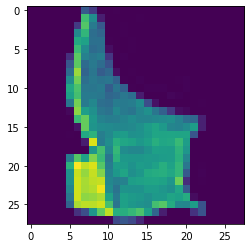

In [5]:
# B->T
# flip vertically, transpose

X_trainFlipHorizontal = np.flip(X_train,1)
X_validFlipHorizontal = np.flip(X_valid,1)
X_testFlipHorizontal = np.flip(X_test,1)


X_trainBtoT = np.transpose(X_trainFlipHorizontal,(0,2,1))
X_validBtoT = np.transpose(X_validFlipHorizontal,(0,2,1))
X_testBtoT = np.transpose(X_testFlipHorizontal,(0,2,1))

plt.imshow(X_trainBtoT[1])
plt.imshow(X_trainBtoT[1])

(45000, 28, 112)
(15000, 28, 112)


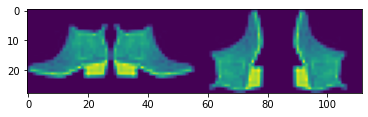

In [6]:
# combine images

X_trainCombined = np.concatenate((X_train, X_trainRtoL, X_trainTtoB, X_trainBtoT), axis=2)
X_validCombined = np.concatenate((X_valid, X_validRtoL, X_validTtoB, X_validBtoT), axis=2)

print(X_trainCombined.shape)
print(X_validCombined.shape)

plt.imshow(X_trainCombined[1])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 112)]    0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 200)          170400      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 200)         128400      ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 400)          0           ['bidirectional[0][0]',      

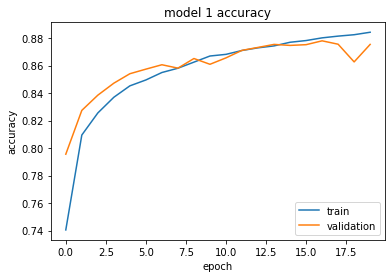

In [7]:
# NN 1 combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(100))(input)
bi2 = keras.layers.Bidirectional(GRU(100))(input)
concat = keras.layers.Concatenate()([bi1, bi2])
flat = keras.layers.Flatten(input_shape=[28, 112])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model1 = keras.Model(inputs=[input], outputs=[output])

model1.summary()

model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history1 = model1.fit(X_trainCombined, y_train, epochs=20, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 112)]    0           []                               
                                                                                                  
 bidirectional_6 (Bidirectional  (None, 200)         170400      ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_7 (Bidirectional  (None, 200)         128400      ['input_3[0][0]']                
 )                                                                                                
                                                                                            

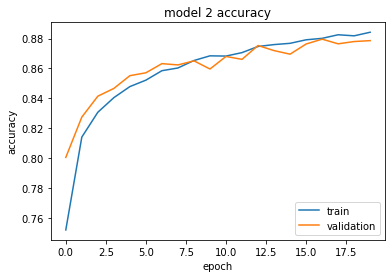

In [9]:
# NN 2 combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(100))(input)
bi2 = keras.layers.Bidirectional(GRU(100))(input)
concat = keras.layers.Concatenate()([bi1, bi2])
flat = keras.layers.Flatten(input_shape=[28, 224])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model2 = keras.Model(inputs=[input], outputs=[output])

model2.summary()

model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history2 = model2.fit(X_trainCombined, y_train, epochs=20, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 permute_1 (Permute)            (None, 28, 28)       0           ['input_4[0][0]']                
                                                                                                  
 bidirectional_8 (Bidirectional  (None, 200)         103200      ['input_4[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_9 (Bidirectional  (None, 200)         78000       ['input_4[0][0]']          

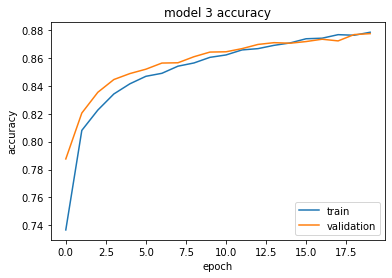

In [10]:
# NN 3 permute images

input = keras.layers.Input(shape=[28, 28])
bi1 = keras.layers.Bidirectional(LSTM(100))(input)
bi2 = keras.layers.Bidirectional(GRU(100))(input)
perm = keras.layers.Permute((1,2), input_shape=[28, 28])(input)
bi3 = keras.layers.Bidirectional(LSTM(100))(perm)
bi4 = keras.layers.Bidirectional(GRU(100))(perm)
concat = keras.layers.Concatenate()([bi1, bi2, bi3, bi4])
flat = keras.layers.Flatten(input_shape=[28, 448])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model3 = keras.Model(inputs=[input], outputs=[output])

model3.summary()

model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history3 = model3.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_valid, y_valid))

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 112)]    0           []                               
                                                                                                  
 bidirectional_12 (Bidirectiona  (None, 200)         170400      ['input_5[0][0]']                
 l)                                                                                               
                                                                                                  
 bidirectional_13 (Bidirectiona  (None, 200)         128400      ['input_5[0][0]']                
 l)                                                                                               
                                                                                            

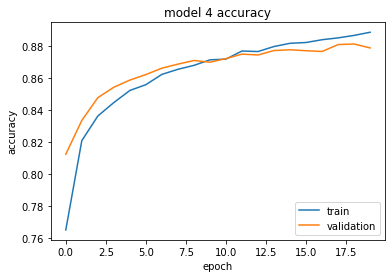

In [11]:
# NN 4 combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(100))(input)
bi2 = keras.layers.Bidirectional(GRU(100))(input)
bi3 = keras.layers.Bidirectional(LSTM(100))(input)
bi4 = keras.layers.Bidirectional(GRU(100))(input)
concat = keras.layers.Concatenate()([bi1, bi2, bi3, bi4])
flat = keras.layers.Flatten(input_shape=[28, 448])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model4 = keras.Model(inputs=[input], outputs=[output])

model4.summary()

model4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history4 = model4.fit(X_trainCombined, y_train, epochs=20, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model 4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 112)]    0           []                               
                                                                                                  
 permute_3 (Permute)            (None, 28, 112)      0           ['input_7[0][0]']                
                                                                                                  
 bidirectional_20 (Bidirectiona  (None, 200)         170400      ['input_7[0][0]']                
 l)                                                                                               
                                                                                                  
 bidirectional_21 (Bidirectiona  (None, 200)         128400      ['input_7[0][0]']          

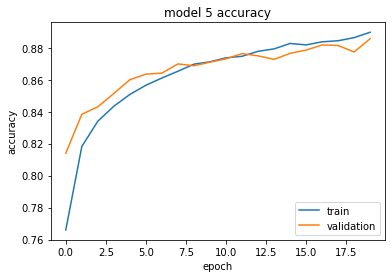

In [13]:
# NN 5 permute combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(100))(input)
bi2 = keras.layers.Bidirectional(GRU(100))(input)
perm = keras.layers.Permute((1,2), input_shape=[28, 28])(input)
bi3 = keras.layers.Bidirectional(LSTM(100))(perm)
bi4 = keras.layers.Bidirectional(GRU(100))(perm)
concat = keras.layers.Concatenate()([bi1, bi2, bi3, bi4])
flat = keras.layers.Flatten(input_shape=[28, 448])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model5 = keras.Model(inputs=[input], outputs=[output])

model5.summary()

model5.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history5 = model5.fit(X_trainCombined, y_train, epochs=20, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model 5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 28, 112)]    0           []                               
                                                                                                  
 bidirectional_30 (Bidirectiona  (None, 100)         65200       ['input_10[0][0]']               
 l)                                                                                               
                                                                                                  
 bidirectional_31 (Bidirectiona  (None, 100)         49200       ['input_10[0][0]']               
 l)                                                                                               
                                                                                            

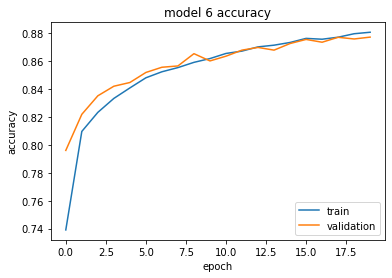

In [16]:
# NN 6 combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(50))(input)
bi2 = keras.layers.Bidirectional(GRU(50))(input)
bi3 = keras.layers.Bidirectional(LSTM(50))(input)
bi4 = keras.layers.Bidirectional(GRU(50))(input)
concat = keras.layers.Concatenate()([bi1, bi2, bi3, bi4])
flat = keras.layers.Flatten(input_shape=[28, 448])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model6 = keras.Model(inputs=[input], outputs=[output])

model6.summary()

model6.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history6 = model6.fit(X_trainCombined, y_train, epochs=20, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model 6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 28, 112)]    0           []                               
                                                                                                  
 bidirectional_34 (Bidirectiona  (None, 1000)        2452000     ['input_11[0][0]']               
 l)                                                                                               
                                                                                                  
 bidirectional_35 (Bidirectiona  (None, 1000)        1842000     ['input_11[0][0]']               
 l)                                                                                               
                                                                                           

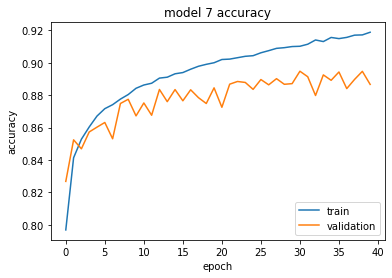

In [17]:
# NN 7 combined images

input = keras.layers.Input(shape=[28, 112])
bi1 = keras.layers.Bidirectional(LSTM(500))(input)
bi2 = keras.layers.Bidirectional(GRU(500))(input)
concat = keras.layers.Concatenate()([bi1, bi2])
flat = keras.layers.Flatten(input_shape=[28, 224])(concat)
batch1=keras.layers.BatchNormalization()(flat)
hidden1 = keras.layers.Dense(300, activation="relu")(batch1)
drop=keras.layers.Dropout(0.1)(hidden1)
output = keras.layers.Dense(10, activation="softmax")(drop)
model7 = keras.Model(inputs=[input], outputs=[output])

model7.summary()

model7.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

with tf.device("/device:GPU:1"):
    history7 = model7.fit(X_trainCombined, y_train, epochs=40, batch_size=128, validation_data=(X_validCombined, y_valid))

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model 7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')